<a href="https://colab.research.google.com/github/Sugoto/Human-Activity-Recognition/blob/main/HAR_for_ages_70%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using LSTM for the HAR70+ dataset**

Epoch 1/5
5843/5843 [==============================] - 33s 5ms/step - loss: 0.2895 - accuracy: 0.9125 - val_loss: 0.1579 - val_accuracy: 0.9537
Epoch 2/5
5843/5843 [==============================] - 30s 5ms/step - loss: 0.1605 - accuracy: 0.9539 - val_loss: 0.1406 - val_accuracy: 0.9606
Epoch 3/5
5843/5843 [==============================] - 29s 5ms/step - loss: 0.1421 - accuracy: 0.9589 - val_loss: 0.1266 - val_accuracy: 0.9621
Epoch 4/5
5843/5843 [==============================] - 29s 5ms/step - loss: 0.1335 - accuracy: 0.9610 - val_loss: 0.1461 - val_accuracy: 0.9549
Epoch 5/5
325/325 [==============================] - 1s 2ms/step - loss: 0.1394 - accuracy: 0.9582
Epoch 1/5
5843/5843 [==============================] - 31s 5ms/step - loss: 0.2816 - accuracy: 0.9150 - val_loss: 0.1594 - val_accuracy: 0.9575
Epoch 2/5
5843/5843 [==============================] - 30s 5ms/step - loss: 0.1495 - accuracy: 0.9573 - val_loss: 0.1382 - val_accuracy: 0.9616
Epoch 3/5
5843/5843 [================

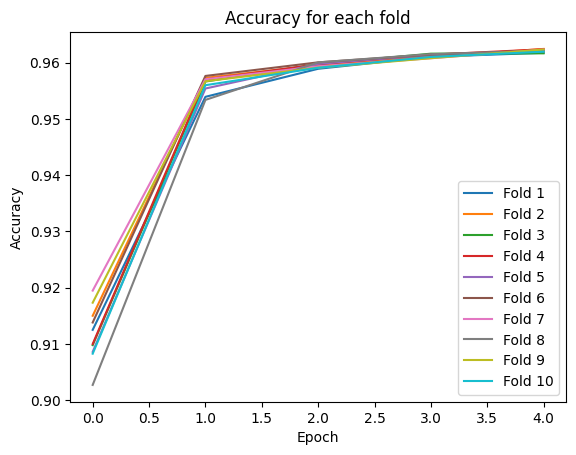

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/HAR70plus/501.csv')

data = data.iloc[:, 1:]

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert the labels to one-hot encoding
y = pd.get_dummies(y).values

# Define the KFold object
kf = KFold(n_splits=10, shuffle=True)

# Initialize the list to store the accuracy scores for each fold
accuracy_scores = []

# Initialize the list to store the history of each fold
history_list = []

# Loop over each fold
for train_idx, test_idx in kf.split(X, y):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Create the model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model with early stopping
    history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=5, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), callbacks=[early_stopping])

    # Evaluate the model on the testing set for this fold
    _, accuracy = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

    # Append the accuracy score to the list for this fold
    accuracy_scores.append(accuracy)

    # Append the history to the list for this fold
    history_list.append(history)

# Calculate the mean and standard deviation of the accuracy scores across all folds
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation in the desired format
print('Mean accuracy: %.2f%% (+- %.2f%%)' % (mean_accuracy * 100, std_accuracy * 100))

# Plot the accuracy for each fold
for i, history in enumerate(history_list):
    plt.plot(history.history['accuracy'], label=f'Fold {str(i + 1)}')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold')
plt.legend()
plt.show()
